Enunciado: https://gist.github.com/fraimondo/9f779d083a47c18800130ca8d1b143b9

## TP3

Integrantes:
* Martín Fosco LU: 449/13
* Javier Minces LU: 231/13

### Imports

In [77]:
import scipy.signal as sig
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
import sklearn as sck
from sklearn import metrics

### 1

In [79]:
bandas = [0, 4, 8, 13, 30, 45]
nombres_bandas = ["alpha", "beta", "gamma", "theta", "delta"]
pacientes = ["../TP2/" + l + str(i).zfill(2) + ".mat" for i in range(1,11) for l in "PS"]

df_arrays = []
indices = [[], []]
for paciente in pacientes:
    test = sio.loadmat(paciente)["data"]
    avg1 = np.mean(test, axis = 1)
    for epoch in range(len(avg1)):
        epochData = avg1[epoch]
        freq, pot = sig.welch(epochData, fs = 250, nfft = 2048)
        array_de_banda = []
        for i in range(len(bandas) -1):
            inicio = bandas[i] 
            fin = bandas[i+1]
            suma = sum([pot[i] for i in range(len(pot)) if freq[i] >= inicio and freq[i] < fin])
            #bandaspaciente[paciente][epoch].append(suma)
            array_de_banda.append(suma)
        indices[0].append(paciente[7: 10])
        indices[1].append(epoch)
        df_arrays.append(array_de_banda)
    
        
df_posta = pd.DataFrame(df_arrays, index = indices)

In [171]:
df_norm = df_posta.div(df_posta.sum(axis=1), axis=0)

means = df_posta.mean(axis = 0, level = 0)
sd = df_posta.std(axis = 0, level = 0)
means_norm = df_norm.mean(axis = 0, level = 0)
sd_norm = df_norm.std(axis = 0, level = 0)

features = means
features = features.join(sd, lsuffix=' mean', rsuffix=' sd')
features = features.join(means_norm, rsuffix=' mean_norm')
features = features.join(sd_norm, rsuffix=' sd_norm')
features



,0 mean,1 mean,2 mean,3 mean,4 mean,0 sd,1 sd,2 sd,3 sd,4 sd,0,1,2,3,4,0 sd_norm,1 sd_norm,2 sd_norm,3 sd_norm,4 sd_norm
P01,6.474048e-13,1.100986e-13,4.915512e-14,1.215176e-13,1.079005e-13,8.438173e-13,1.085643e-13,4.300826e-14,1.762332e-13,2.364435e-13,0.562846,0.141507,0.068600,0.133655,0.093391,0.255662,0.113970,0.060397,0.116634,0.137950
P02,1.773805e-12,4.384172e-13,3.845398e-14,4.190222e-14,2.872480e-14,1.561659e-12,4.418096e-13,3.609953e-14,3.390900e-14,3.185065e-14,0.693425,0.236993,0.024343,0.027019,0.018220,0.231751,0.203750,0.027736,0.029916,0.024715
P03,4.802599e-13,3.555275e-14,1.217894e-14,9.120573e-15,5.476067e-15,5.234544e-13,2.733030e-14,9.021652e-15,6.819887e-15,4.865489e-15,0.785837,0.113357,0.044831,0.034478,0.021497,0.173345,0.101005,0.051125,0.035898,0.026825
P04,7.785647e-14,2.989911e-14,6.859796e-15,2.399459e-15,7.913585e-16,1.005892e-13,2.557905e-14,6.603214e-15,2.000155e-15,1.023748e-15,0.554814,0.318967,0.083831,0.031548,0.010840,0.232626,0.191334,0.079399,0.030493,0.015844
P05,2.227245e-12,3.278892e-13,1.387457e-13,5.098322e-13,4.054396e-13,2.226175e-12,2.395002e-13,9.170506e-14,3.405645e-13,3.364389e-13,0.540464,0.111245,0.049036,0.168984,0.130271,0.214912,0.086591,0.036578,0.105956,0.095373
P06,4.480578e-14,5.796897e-15,2.947436e-15,2.015353e-15,4.322217e-16,8.385846e-14,8.323683e-15,2.714622e-15,2.710343e-15,5.937101e-16,0.674253,0.156720,0.090712,0.065685,0.012630,0.197511,0.119511,0.081611,0.066776,0.014145
P07,8.341240e-13,1.603714e-13,3.414281e-14,7.011479e-14,4.038596e-14,7.903372e-13,1.501119e-13,2.774715e-14,4.887120e-14,3.858830e-14,0.647684,0.160678,0.043964,0.094887,0.052786,0.194662,0.112323,0.040027,0.083938,0.053647
P08,9.140278e-13,1.924867e-13,2.798522e-14,2.311164e-14,1.043328e-14,1.454132e-12,2.609050e-13,3.124653e-14,2.745740e-14,1.940317e-14,0.663010,0.232114,0.049191,0.040467,0.015218,0.219839,0.171706,0.054306,0.045862,0.020046
P09,2.784133e-11,6.505424e-12,1.929685e-12,5.258367e-12,3.866779e-12,5.005802e-11,9.166444e-12,2.284302e-12,3.668938e-12,3.164736e-12,0.475314,0.155359,0.054890,0.179677,0.134761,0.231364,0.116943,0.042868,0.122528,0.105200
P10,8.970983e-15,2.895932e-15,8.947480e-16,8.537944e-16,4.169272e-16,8.657445e-15,2.358702e-15,8.198046e-16,1.489474e-15,1.181577e-15,0.586206,0.240692,0.082040,0.064703,0.026358,0.212920,0.155263,0.069704,0.063442,0.046208


P01    6.474048e-13
P02    1.773805e-12
P03    4.802599e-13
P04    7.785647e-14
P05    2.227245e-12
P06    4.480578e-14
P07    8.341240e-13
P08    9.140278e-13
P09    2.784133e-11
P10    8.970983e-15
S01    1.880655e-14
S02    6.450044e-15
S03    1.905026e-14
S04    1.407961e-13
S05    3.942853e-15
S06    6.617083e-15
S07    3.592380e-13
S08    1.042728e-13
S09    1.120012e-10
S10    1.376087e-13
Name: 0 mean, dtype: float64


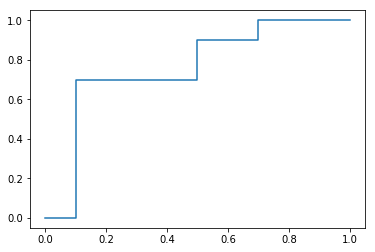

0.76


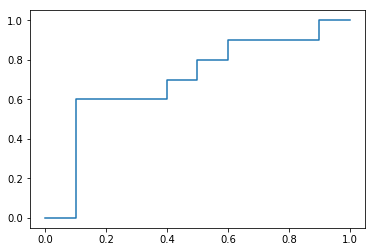

0.7


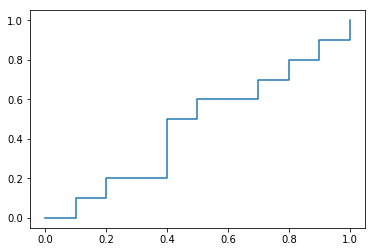

0.46


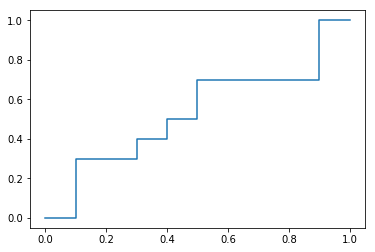

0.53


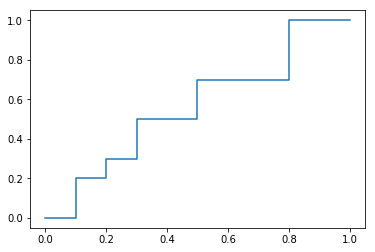

0.56


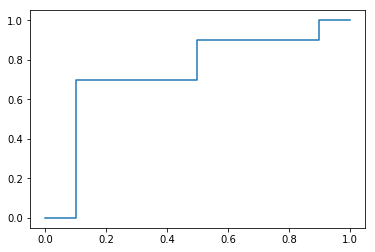

0.74


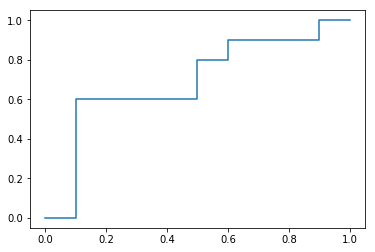

0.69


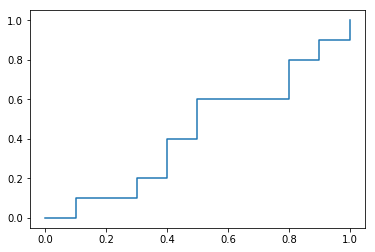

0.43


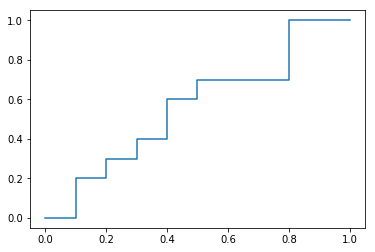

0.56


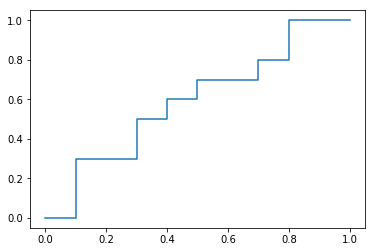

0.59


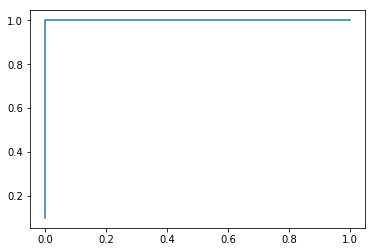

1.0


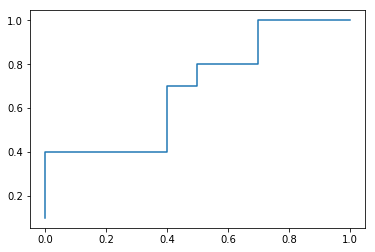

0.69


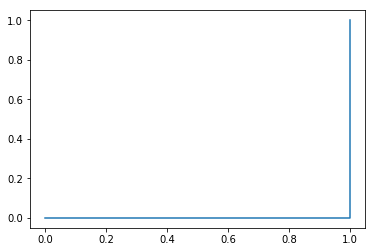

0.0


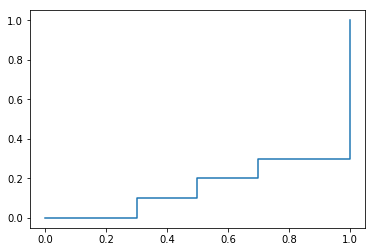

0.15


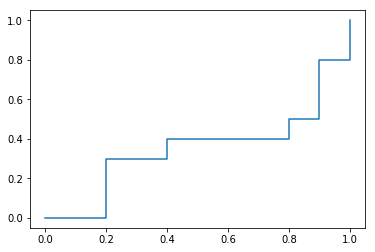

0.35


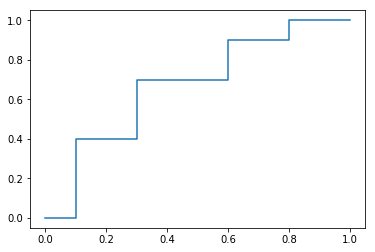

0.67


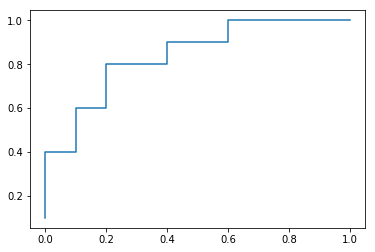

0.84


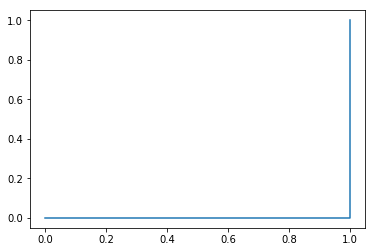

0.0


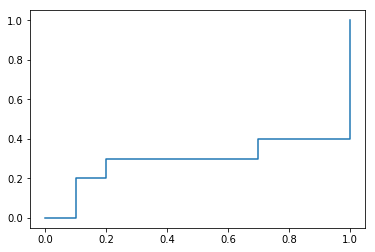

0.29


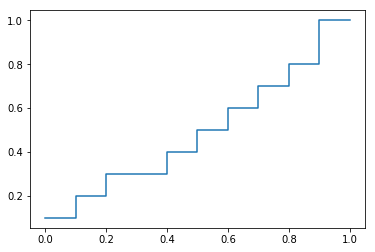

0.49


In [242]:
nombres_paciente = [l + str(i).zfill(2) for l in "PS" for i in range(1,11)]

for column in features:
    y_score = features[column]
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    plt.plot(fpr, tpr)
    plt.show()


### 2.1 b - Graficado ROC con cross validation sobre Logistic Regression

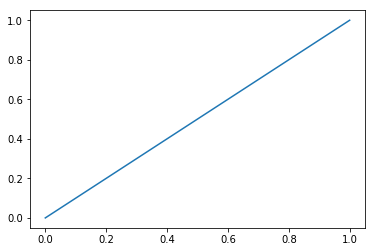

0.5


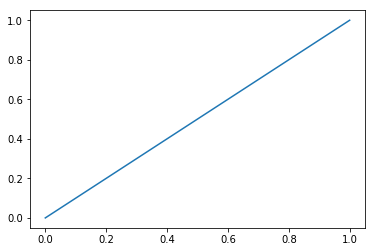

0.5


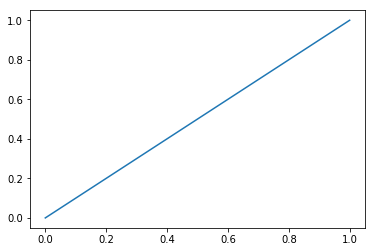

0.5


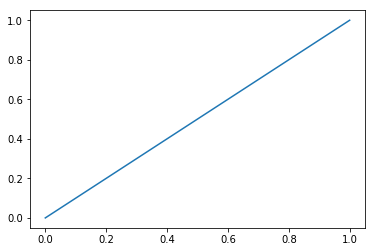

0.5


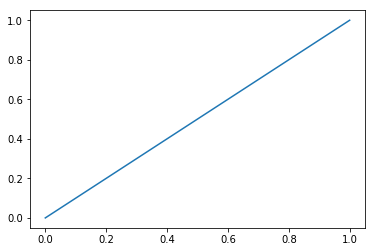

0.5


'\nfor column in features:\n    x = features[column]\n    y = np.array([n[0]=="P" for n in nombres_paciente])\n    x = x.reshape(-1,1)\n    estimator = linear_model.LogisticRegression()\n    result = model_selection.cross_val_predict(estimator, x, y, method = "predict_proba")\n    y_score = [r[1] for r in result]\n    fpr, tpr, thresholds = metrics.roc_curve(y, y_score)\n    plt.plot(fpr, tpr)\n    plt.show()\n    print metrics.roc_auc_score(y, y_score)'

In [248]:
from sklearn import linear_model
from sklearn import model_selection

for column in features:
    x = features[column]
    y = np.array([n[0]=="P" for n in nombres_paciente])
    x = x.reshape(-1,1)
    estimator = linear_model.LogisticRegression()
    result = model_selection.cross_val_predict(estimator, x, y, method = "predict_proba")
    y_score = [r[1] for r in result]
    fpr, tpr, thresholds = metrics.roc_curve(y, y_score)
    plt.plot(fpr, tpr)
    plt.show()
    print metrics.roc_auc_score(y, y_score)

### 2.2 a - Curva ROC sobre un Support Vector Machine

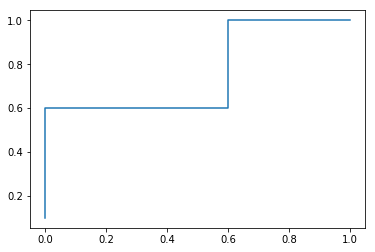

0.76


In [249]:
from sklearn import svm
from sklearn import model_selection

x = features
y = np.array([n[0]=="P" for n in nombres_paciente])
estimator = svm.SVC(probability = True)
result = model_selection.cross_val_predict(estimator, x, y, method = "predict_proba")
#print result
y_score = [r[0] for r in result]
fpr, tpr, thresholds = sck.metrics.roc_curve(y, y_score)
#print fpr, tpr
plt.plot(fpr, tpr)
plt.show()
print metrics.roc_auc_score(y, y_score)


### 2.2 b

[ 0.   0.   0.3  0.3  0.5  0.6  0.6  1. ] [ 0.1  0.3  0.3  0.5  0.6  0.6  1.   1. ]


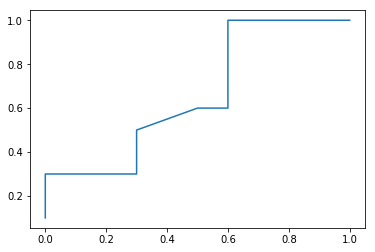

0.66
[ 0.   0.   0.3  0.3  0.5  0.6  0.6  1. ] [ 0.1  0.3  0.3  0.6  0.6  0.6  1.   1. ]


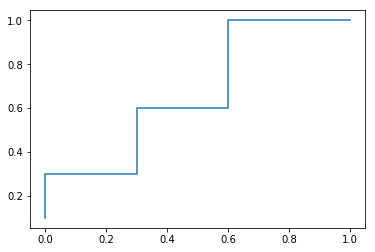

0.67
[ 0.   0.   0.2  0.4  0.4  0.6  0.6  1. ] [ 0.1  0.2  0.4  0.4  0.7  0.7  1.   1. ]


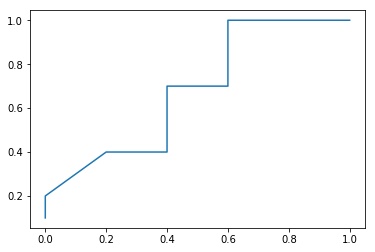

0.68


In [235]:
from sklearn import svm
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def pipeline(percentile):
    std_scaler = StandardScaler()
    f_select = sck.feature_selection.SelectPercentile(percentile = percentile)
    svc = svm.SVC(probability = False)
    pipeline = Pipeline(steps = [('stdscaler', std_scaler), ('fixtureSelection', f_select), ('svc', svc)])

    x = features
    y = np.array([n[0]=="P" for n in nombres_paciente])
    result = model_selection.cross_val_predict(estimator, x, y, method = "predict_proba")
    #print result
    y_score = [r[0] for r in result]
    fpr, tpr, thresholds = metrics.roc_curve(y, y_score)
    print fpr, tpr
    plt.plot(fpr, tpr)
    plt.show()
    print metrics.roc_auc_score(y, y_score)


pipeline(10)
pipeline(20)
pipeline(35)
